# Literature analysis

When we look for new literature we may search at google scholar. Then we read an article. We look at the references and then we find another article and so on. My colleque Marco B. showed me his data science approach to search for literature and I implemented his workflow in this notebook.

The first step is to create a literature database for our topic. For this, we can use [Publish or Perish](https://harzing.com/resources/publish-or-perish/). 

![image](pop.png)

Here we can choose a literature  database (for example "google scholar") and can define for example keywords that should be in the article we are looking for. We can also define the maximum number of results. The default value of 200 is a good starting point. Now we click on "Search" and then on "Save Results" -> "Results as CSV...". And now we have our literature database. Next, we can load this literature database into this notebook.

In [1]:
import pandas as pd

df = pd.read_csv("kubelka.csv")
df.head()

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract,FullTextURL,RelatedURL
0,183,"S Landi Jr, IR Segundo, E Freitas, M Vasilevskiy…",Use and misuse of the Kubelka-Munk function to...,2022.0,Solid state …,Elsevier,https://www.sciencedirect.com/science/article/...,https://scholar.google.com/scholar?cites=19716...,1,2024-02-09 13:10:22,...,NaN,NaN,183,91.50,37,5,2.0,"… In this context, the classical Kubelka-Munk ...",http://repositorium.uminho.pt/bitstream/1822/7...,https://scholar.google.com/scholar?q=related:2...
1,446,"L Yang, B Kruse",Revised Kubelka–Munk theory. I. Theory and app...,2004.0,JOSA A,opg.optica.org,https://opg.optica.org/abstract.cfm?uri=josaa-...,https://scholar.google.com/scholar?cites=18431...,2,2024-02-09 13:10:22,...,NaN,NaN,446,22.30,223,2,20.0,Using a statistical analysis of light propagat...,https://www.academia.edu/download/34493233/I.K...,https://scholar.google.com/scholar?q=related:W...
2,55,"R Alcaraz de la Osa, I Iparragirre, D Ortiz, J...",The extended Kubelka–Munk theory and its appli...,2020.0,ChemTexts,Springer,https://link.springer.com/article/10.1007/s408...,https://scholar.google.com/scholar?cites=13020...,3,2024-02-09 13:10:22,...,NaN,NaN,55,13.75,14,4,4.0,The Kubelka–Munk theory is one of the main the...,NaN,https://scholar.google.com/scholar?q=related:e...
3,281,"WE Vargas, GA Niklasson",Applicability conditions of the Kubelka–Munk t...,1997.0,Applied optics,opg.optica.org,https://opg.optica.org/abstract.cfm?uri=ao-36-...,https://scholar.google.com/scholar?cites=12274...,4,2024-02-09 13:10:22,...,NaN,NaN,281,10.41,141,2,27.0,The description of optical properties of light...,https://www.academia.edu/download/50141809/AO....,https://scholar.google.com/scholar?q=related:9...
4,126,"ZC Orel, MK Gunde, B Orel",Application of the Kubelka-Munk theory for the...,1997.0,Progress in Organic Coatings,Elsevier,https://www.sciencedirect.com/science/article/...,https://scholar.google.com/scholar?cites=11546...,5,2024-02-09 13:10:22,...,NaN,NaN,126,4.67,42,3,27.0,… The Kubelka-Munk absorption and scattering c...,https://www.academia.edu/download/32207870/1-s...,https://scholar.google.com/scholar?q=related:H...


As a first analysis, we want to find out, how the topic evolved over time. The number of articles may increase with time, because the topic is hot and there may be opportunities for another research project. Or we can see that the number decrease, because topic is not interesting an more and is maybe replaced by new topics.

array([[<Axes: title={'center': 'Year'}>]], dtype=object)

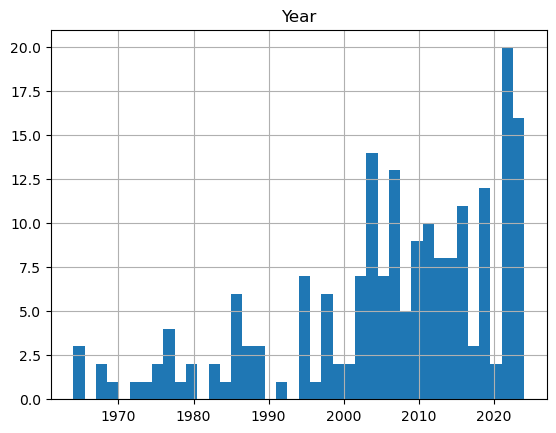

In [2]:
df.hist(column='Year', bins=40)

Next, we want to see the most cited articles from our database. This may be a good starting point for reading, because this articles seems to be important to others.

In [3]:
df["TotalCites"] = df["CitesPerAuthor"]*df["AuthorCount"]
df[["Authors", "Title", "Year", "TotalCites"]].nlargest(10, columns=["TotalCites"])

,Authors,Title,Year,TotalCites
1,"L Yang, B Kruse",Revised Kubelka–Munk theory. I. Theory and app...,2004.0,446
7,"V Barrón, J Torrent",Use of the Kubelka—Munk theory to study the in...,1986.0,378
3,"WE Vargas, GA Niklasson",Applicability conditions of the Kubelka–Munk t...,1997.0,282
21,"AA Christy, OM Kvalheim, RA Velapoldi",Quantitative analysis in diffuse reflectance s...,1995.0,228
27,"V Džimbeg-Malčić, Ž Barbarić-Mikočević, K Itrić",Kubelka-Munk theory in describing optical prop...,2011.0,225
0,"S Landi Jr, IR Segundo, E Freitas, M Vasilevskiy…",Use and misuse of the Kubelka-Munk function to...,2022.0,185
6,"ML Myrick, MN Simcock, M Baranowski…",The Kubelka-Munk diffuse reflectance formula r...,2011.0,180
17,"L Yang, SJ Miklavcic",Revised Kubelka–Munk theory. III. A general th...,2005.0,178
23,AB Murphy,Modified Kubelka–Munk model for calculation of...,2006.0,157
41,M Otsuka,Comparative particle size determination of phe...,2004.0,151


Then we want to see the raising articles. This are the articles with the highest cites per year. This articles may be interesting to, because they may contain important ideas related to the topic.

In [4]:
df[["Authors", "Title", "Year", "CitesPerYear"]].nlargest(10, columns=["CitesPerYear"])

,Authors,Title,Year,CitesPerYear
0,"S Landi Jr, IR Segundo, E Freitas, M Vasilevskiy…",Use and misuse of the Kubelka-Munk function to...,2022.0,91.50
1,"L Yang, B Kruse",Revised Kubelka–Munk theory. I. Theory and app...,2004.0,22.30
5,"SS Abdullahi, S Güner, Y Musa, BI Adamu…",Sımple method for the determınatıon of band ga...,2016.0,18.25
27,"V Džimbeg-Malčić, Ž Barbarić-Mikočević, K Itrić",Kubelka-Munk theory in describing optical prop...,2011.0,17.31
40,"R Yuan, M Guo, C Li, S Chen, G Liu, J He…",Detection of early bruises in jujubes based on...,2022.0,15.00
6,"ML Myrick, MN Simcock, M Baranowski…",The Kubelka-Munk diffuse reflectance formula r...,2011.0,13.92
2,"R Alcaraz de la Osa, I Iparragirre, D Ortiz, J...",The extended Kubelka–Munk theory and its appli...,2020.0,13.75
16,"L Tolvaj, K Mitsui, D Varga",Validity limits of Kubelka–Munk theory for DRI...,2011.0,10.46
3,"WE Vargas, GA Niklasson",Applicability conditions of the Kubelka–Munk t...,1997.0,10.41
26,"H Jamil, IM Dildar, U Ilyas, JZ Hashmi, S Shau...",Microstructural and Optical study of polycryst...,2021.0,10.33


Now we want to find the experts for the topic and how these experts work together. To do this, we build a graph. The nodes are the authors. Each pair of authors, that worked together, is an edge in this graph. Here we define the node size from the count of publications per author and the edge sizes from the number of publication by each pair of authors.

In [5]:
from itertools import pairwise
from collections import Counter

authors = df["Authors"]
edge_list = list()

author_list = list()

for row in authors:
    # some data cleaning
    row = row.replace("…, ", "")
    row = row.replace("…", "")

    auth = row.split(", ")

    if len(auth) > 1:
        for p1, p2 in pairwise(auth):
            edge_list.append(tuple(sorted([p1, p2])))

    for a in auth:
        author_list.append(a)

edges = Counter(edge_list)
nodes = Counter(author_list)

print("Maximal number of publications with the same pair of authors: " + str(max(edges.values())))
print("Maximal number of publications from an author: " + str(max(nodes.values())))


Maximal number of publications with the same pair of authors: 4
Maximal number of publications from an author: 7


Now we can use the information on nodes and edges to build and plot the graph. The graph can be found in the separate file "nx.html".

In [6]:
from pyvis.network import Network
import networkx as nx

# change scale to change edge and node sizes.
scale_nodes = 10
scale_edges = 5

# Create graph and add edges.
G = nx.Graph()
G.add_weighted_edges_from([(k[0], k[1], v*scale_edges) for k,v in edges.items()])

# Add node sizes 
d = dict(nodes)
d.update((x, scale_nodes * y) for x, y in d.items())
nx.set_node_attributes(G, d, 'size')

# Plot graph with pyvis
nt = Network('1000px', '1000px', notebook=True, cdn_resources='remote')
nt.from_nx(G)
nt.show('nx.html')


In this graph we see clusters of authors, that worked together. Each cluster has their own ideas on this topic.

In [8]:
from IPython.display import HTML

HTML(filename="nx.html")